In [1]:
!pip install scikeo rasterio dbfread openpyxl imblearn -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 41.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 42.0 MB/s eta 0:00:00


In [2]:
# Bibliotecas
import rasterio
import numpy as np
from scikeo.deeplearning import DL
from scikeo.process import extract
import matplotlib.pyplot as plt
from dbfread import DBF
import pandas as pd
from rasterio.plot import reshape_as_image

In [3]:
# Leitura da imagem
path_raster = r"/content/drive/MyDrive/Curso PDI com Python/L71221071_07120010720_DN.tif"
img = rasterio.open(path_raster)

In [6]:
# Lendo conjunto de treinamento
endm = pd.read_excel("/content/drive/MyDrive/Curso PDI com Python/df_class.xlsx")

#Verificando se há valores nulos
endm.isna().sum()

,0
id,0
L71221071_07120010720_DN_1,0
L71221071_07120010720_DN_2,0
L71221071_07120010720_DN_3,0
L71221071_07120010720_DN_4,0
L71221071_07120010720_DN_5,0
L71221071_07120010720_DN_6,0


In [8]:
# Definindo coluna classe
endm['class'] = endm['id']

# Removendo coluna id
endm = endm.drop(columns = ['id'])
endm.head()

,L71221071_07120010720_DN_1,L71221071_07120010720_DN_2,L71221071_07120010720_DN_3,L71221071_07120010720_DN_4,L71221071_07120010720_DN_5,L71221071_07120010720_DN_6,class
0,51,37,30,88,51,25,3
1,51,37,29,82,52,26,3
2,49,37,30,80,51,26,3
3,50,37,29,81,49,24,3
4,48,36,28,77,46,25,3


In [9]:
# Iniciando classificador
inst = DL(image = img, endmembers = endm, nodata = 0)

In [14]:
# Definindo arquitetura da rede
fc = inst.FullyConnected(hidden_layers = 7,
                         hidden_units = [1024,512,256,128,64,16,8],
                         output_units = 7,
                         input_shape = (6,),
                         epochs = 200,
                         batch_size = 32,
                         training_split = 0.5)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


58568/58568 ━━━━━━━━━━━━━━━━━━━━ 201s 3ms/step
371/371 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [15]:
# Verificando métricas
print(fc.get('Overall_Accuracy'))
print(fc.get('Kappa_Index'))
df = fc.get('Confusion_Matrix')

# Gravando matriz de confusão como tabela excel
df.to_excel('confusion_matrix.xlsx')

0.9931720475427801
0.9910776264963488


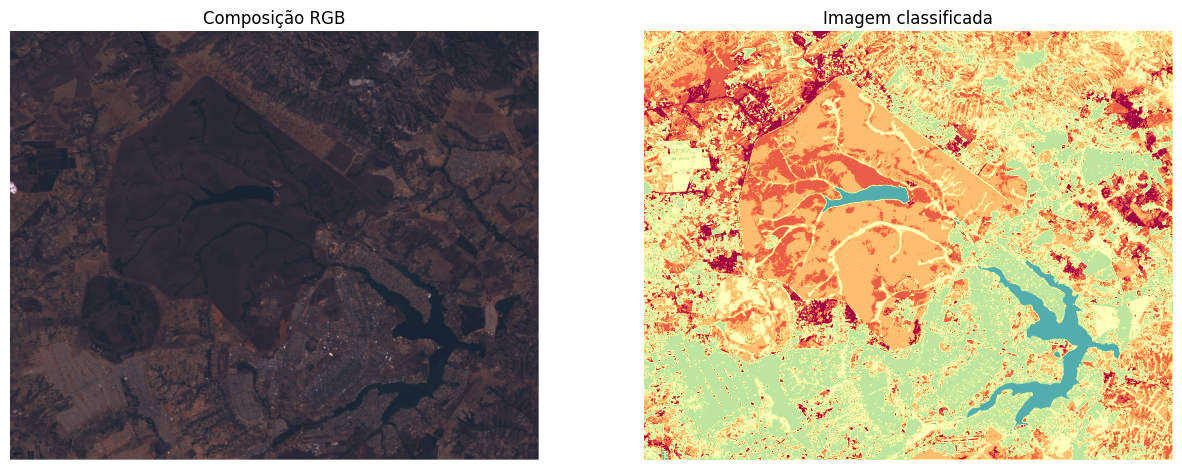

In [19]:
# Visualizando resultado
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 9))
axes[0].imshow(np.dstack([img.read(3),img.read(2),img.read(1)]), cmap = 'gray')
axes[0].set_title("Composição RGB")
axes[0].axis('off')

axes[1].imshow(fc.get('Classification_Map'), cmap= 'Spectral_r')
axes[1].set_title("Imagem classificada")
axes[1].axis('off')
plt.show()